In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
!pip install geopandas
import geopandas

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Com01012021_g")
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g")

In [ ]:
comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


***JOIN SPAZIALI SENZA COLONNE COMUNI***

In [ ]:
comuni2 = comuni[["COMUNE", "geometry"]]
comuni2

,COMUNE,geometry
0,AgliÃ¨,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,Airasca,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,Ala di Stura,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,Albiano d'Ivrea,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,Almese,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...
7898,Villaputzu,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,Villasalto,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,Villasimius,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,Villasor,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [ ]:
#   OPPURE usi FILTER
comuni3 = comuni.filter(items=["COMUNE", "geometry"])
comuni3

,COMUNE,geometry
0,AgliÃ¨,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,Airasca,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,Ala di Stura,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,Albiano d'Ivrea,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,Almese,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...
7898,Villaputzu,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,Villasalto,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,Villasimius,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,Villasor,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [ ]:
province2= province[["DEN_UTS", "geometry"]]
province2

,DEN_UTS,geometry
0,Torino,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,Vercelli,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,Novara,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,Cuneo,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,Asti,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...
102,Verbano-Cusio-Ossola,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,Monza e della Brianza,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,Fermo,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,Barletta-Andria-Trani,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [ ]:
regioni2 = regioni[["DEN_REG", "geometry"]]
regioni2

,DEN_REG,geometry
0,Piemonte,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,Valle d'Aosta,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,Lombardia,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,Trentino-Alto Adige,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,Veneto,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,Friuli Venezia Giulia,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,Liguria,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,Emilia-Romagna,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,Toscana,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,Umbria,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


In [ ]:
#   fa un df in cui mette i comuni all'interno(within) delle province e mettere sempre il df che sara dentro in un'altro df(comuni2 in province2)
#   how funziona solo con inner in questo tipo di merge
com_prov = geopandas.sjoin(comuni2, province2, op="within", how="left")
com_prov

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,COMUNE,geometry,index_right,DEN_UTS
0,AgliÃ¨,"POLYGON ((404703.558 5026682.655, 405359.554 5...",0,Torino
1,Airasca,"POLYGON ((380700.909 4977305.520, 381105.998 4...",0,Torino
2,Ala di Stura,"POLYGON ((364710.857 5022090.678, 364737.794 5...",0,Torino
3,Albiano d'Ivrea,"POLYGON ((415942.504 5033304.609, 416079.315 5...",0,Torino
4,Almese,"POLYGON ((376934.962 4999073.854, 376960.555 4...",0,Torino
...,...,...,...,...
7898,Villaputzu,"MULTIPOLYGON (((556602.772 4375162.650, 556598...",106,Sud Sardegna
7899,Villasalto,"POLYGON ((541186.146 4375105.653, 541180.146 4...",106,Sud Sardegna
7900,Villasimius,"MULTIPOLYGON (((546451.098 4325900.553, 546443...",106,Sud Sardegna
7901,Villasor,"POLYGON ((500362.475 4361229.767, 500397.474 4...",106,Sud Sardegna


In [ ]:
#    sjoin si usa quand dobbiamo unire 2 geodataframe
prov_reg = geopandas.sjoin(province2, regioni2, op="within", how="left")
prov_reg

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,DEN_UTS,geometry,index_right,DEN_REG
0,Torino,"POLYGON ((411015.006 5049970.983, 411266.039 5...",0,Piemonte
1,Vercelli,"POLYGON ((438328.612 5087208.215, 439028.888 5...",0,Piemonte
2,Novara,"POLYGON ((460929.542 5076320.298, 461165.259 5...",0,Piemonte
3,Cuneo,"MULTIPOLYGON (((378673.492 4958865.159, 378928...",0,Piemonte
4,Asti,"POLYGON ((425041.329 4997628.309, 424948.989 4...",0,Piemonte
...,...,...,...,...
102,Verbano-Cusio-Ossola,"POLYGON ((457749.464 5145501.795, 458662.395 5...",0,Piemonte
103,Monza e della Brianza,"POLYGON ((519754.706 5065242.380, 520199.702 5...",2,Lombardia
104,Fermo,"POLYGON ((884760.019 4804406.440, 885511.011 4...",10,Marche
105,Barletta-Andria-Trani,"POLYGON ((1081237.144 4611047.023, 1081399.393...",15,Puglia


In [ ]:
num_prov_in_reg = prov_reg.groupby("DEN_REG", as_index = False)["DEN_UTS"].count()# oppure .reset_index()
num_prov_in_reg

,DEN_REG,DEN_UTS
0,Abruzzo,4
1,Basilicata,2
2,Calabria,5
3,Campania,5
4,Emilia-Romagna,9
5,Friuli Venezia Giulia,4
6,Lazio,5
7,Liguria,4
8,Lombardia,12
9,Marche,5


In [ ]:
import pandas as pd

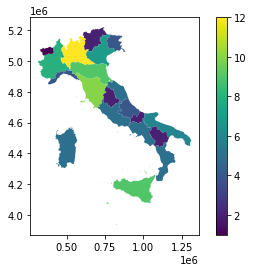

In [ ]:
regioni_province = pd.merge(regioni2, num_prov_in_reg, how="left", on="DEN_REG")

#   colori basati sul numeri di comuni in una regione
regioni_province.plot(legend = True, column="DEN_UTS")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


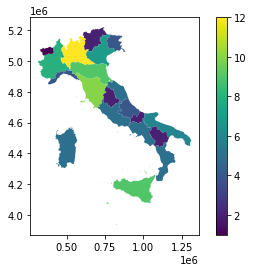

In [ ]:
prov_reg = geopandas.sjoin(province2, regioni2, op="within", how="left")
num_prov_in_reg = prov_reg.groupby("DEN_REG", as_index = False)["DEN_UTS"].count()
regioni_province = pd.merge(regioni2, num_prov_in_reg, how="left", on="DEN_REG")
regioni_province.plot(legend = True, column="DEN_UTS")

***colorare italia in base al numero di comuni in tutti i regioni***

In [ ]:
com_prov = geopandas.sjoin(comuni2, province2, op="within", how="left")
com_prov

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,COMUNE,geometry,index_right,DEN_UTS
0,AgliÃ¨,"POLYGON ((404703.558 5026682.655, 405359.554 5...",0,Torino
1,Airasca,"POLYGON ((380700.909 4977305.520, 381105.998 4...",0,Torino
2,Ala di Stura,"POLYGON ((364710.857 5022090.678, 364737.794 5...",0,Torino
3,Albiano d'Ivrea,"POLYGON ((415942.504 5033304.609, 416079.315 5...",0,Torino
4,Almese,"POLYGON ((376934.962 4999073.854, 376960.555 4...",0,Torino
...,...,...,...,...
7898,Villaputzu,"MULTIPOLYGON (((556602.772 4375162.650, 556598...",106,Sud Sardegna
7899,Villasalto,"POLYGON ((541186.146 4375105.653, 541180.146 4...",106,Sud Sardegna
7900,Villasimius,"MULTIPOLYGON (((546451.098 4325900.553, 546443...",106,Sud Sardegna
7901,Villasor,"POLYGON ((500362.475 4361229.767, 500397.474 4...",106,Sud Sardegna


In [ ]:
num_com_in_prov = com_prov.groupby("DEN_UTS", as_index = False)["COMUNE"].count()
num_com_in_prov

,DEN_UTS,COMUNE
0,Agrigento,43
1,Alessandria,187
2,Ancona,47
3,Aosta,74
4,Arezzo,36
...,...,...
102,Vercelli,82
103,Verona,98
104,Vibo Valentia,50
105,Vicenza,114


In [ ]:
com_province = pd.merge(province2, num_com_in_prov, how="left", on="DEN_UTS")
com_province

,DEN_UTS,geometry,COMUNE
0,Torino,"POLYGON ((411015.006 5049970.983, 411266.039 5...",312
1,Vercelli,"POLYGON ((438328.612 5087208.215, 439028.888 5...",82
2,Novara,"POLYGON ((460929.542 5076320.298, 461165.259 5...",87
3,Cuneo,"MULTIPOLYGON (((378673.492 4958865.159, 378928...",247
4,Asti,"POLYGON ((425041.329 4997628.309, 424948.989 4...",118
...,...,...,...
102,Verbano-Cusio-Ossola,"POLYGON ((457749.464 5145501.795, 458662.395 5...",74
103,Monza e della Brianza,"POLYGON ((519754.706 5065242.380, 520199.702 5...",55
104,Fermo,"POLYGON ((884760.019 4804406.440, 885511.011 4...",40
105,Barletta-Andria-Trani,"POLYGON ((1081237.144 4611047.023, 1081399.393...",10


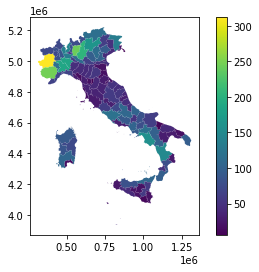

In [ ]:
com_province.plot(legend = True, column="COMUNE")

In [ ]:
#   trova per ogni comune la provincia in cui si trova quel comune
#   effettuando una join spaziale: prende la geometria del comune
#   e cerca in quale geometria della provincia si trova.
#   restituisce un geodataframe
com_prov = geopandas.sjoin(comuni2, province2, op="within", how="left")
com_prov

#   ragruppa i comuni di ogni provincia e li conta.
#   restituisce un dataframe (differenza tra geoDF e DF, è che il geoDF contiene una geometria)
num_com_in_prov = com_prov.groupby("DEN_UTS", as_index = False)["COMUNE"].count()
num_com_in_prov

#   unisce il geoDF delle province con il DF che contiene il num
#   di comuni per ogni provincia:
#   restituisce un geoDF che è uguale a province2 ma con una colonna in piu
#   che è il num di com in ogni provincia
com_province = pd.merge(province2, num_com_in_prov, how="left", on="DEN_UTS")
com_province

#   visualizza le province colorate in base al numero di comuni(column="COMUNE)
com_province.plot(legend = True, column="COMUNE")